In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Chirikov's Standard Map

In [3]:
plt.rcParams['figure.dpi'] = 150

In [4]:
def chirikov(p, q, e):
    """Applies Chirikov's standard map once with parameter e"""
    
    p_prime = (p + e*np.sin(q)) % (2*np.pi)
    q_prime = (p + q + e*np.sin(q)) % (2*np.pi)
    
    return p_prime, q_prime

In [5]:
def frame(e, N=100, r=1):
    '''generates data for N iterations of the Chirikov map with parameter e and 
    resolution r
    
    constant colour represents the same original point but after multiple iterations'''

    p0 = np.arange(0, 2*np.pi, r)
    q0 = np.arange(0, 2*np.pi, r)

    P, Q = np.meshgrid(p0, q0)

    P = P.reshape(len(p0)*len(q0))
    Q = Q.reshape(len(p0)*len(q0))
    
    # The original colour of a point is uniquely determined by an RGB value determined by
    # the starting point where Red is given by P0, Blue is given by Q0, and
    # Green is given by P0+Q0.
    colours = np.array([P/max(P), (P+Q)/max(P+Q), Q/max(Q)]).T

    Pnew = [P]
    Qnew = [Q]
    for i in range(N):
        P, Q = chirikov(P,Q, e=e)
        Qnew.append(Q)
        Pnew.append(P)
    return np.hstack(Pnew), np.hstack(Qnew), np.vstack([colours]*(N+1))

def plot(e, N=200, r=.5):
    '''plots N iterations of the Chirikov map with parameter e and resolution r
    
    constant colour represents the same original point but after multiple iterations'''
    P, Q, colours = frame(e, N, r)

    plt.scatter(Q,P, s=.1, c=colours)
    
    plt.xlabel('Q')
    plt.ylabel('P')
    plt.show()

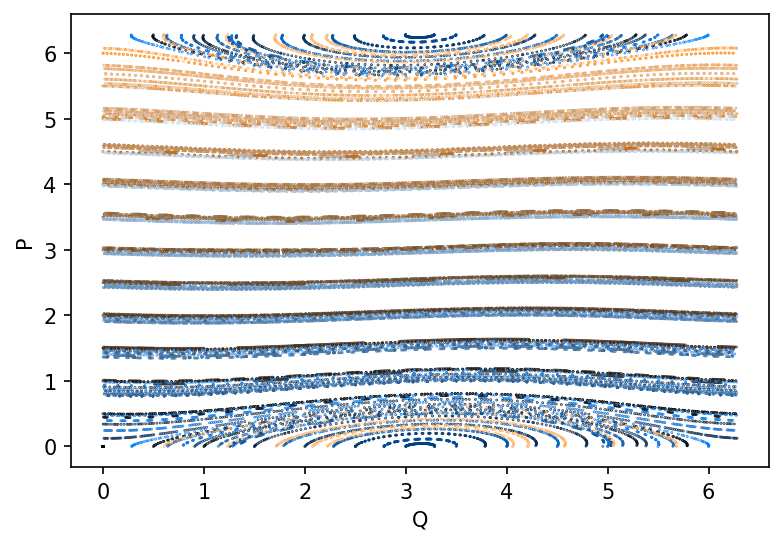

In [6]:
plot(e=.1)

When $\epsilon$ is small, a given point does not appear to explore all of phase space. A point looks like it stays within a "band".

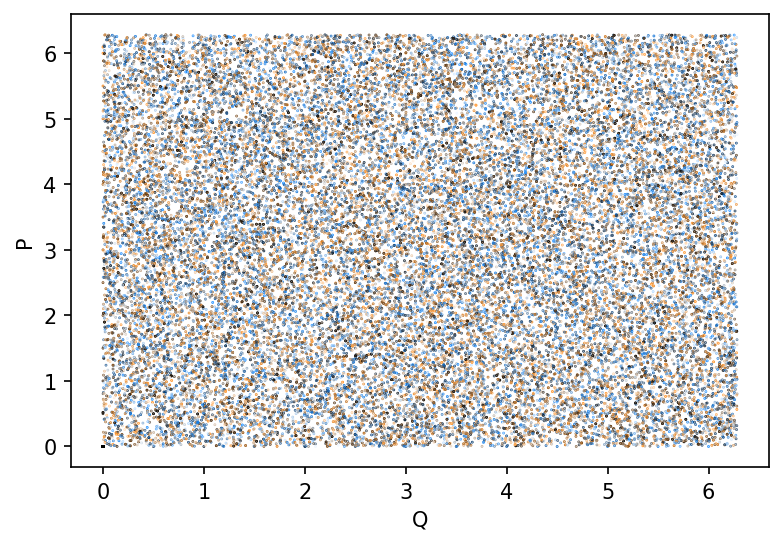

In [7]:
plot(e=100)

When $\epsilon$ is large, a given point does appear to explore all of phase space.

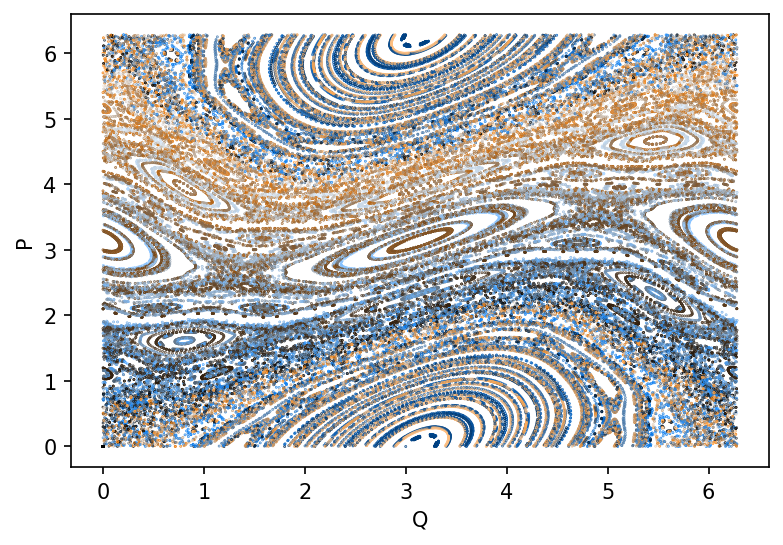

In [8]:
plot(e=1, r=.3)

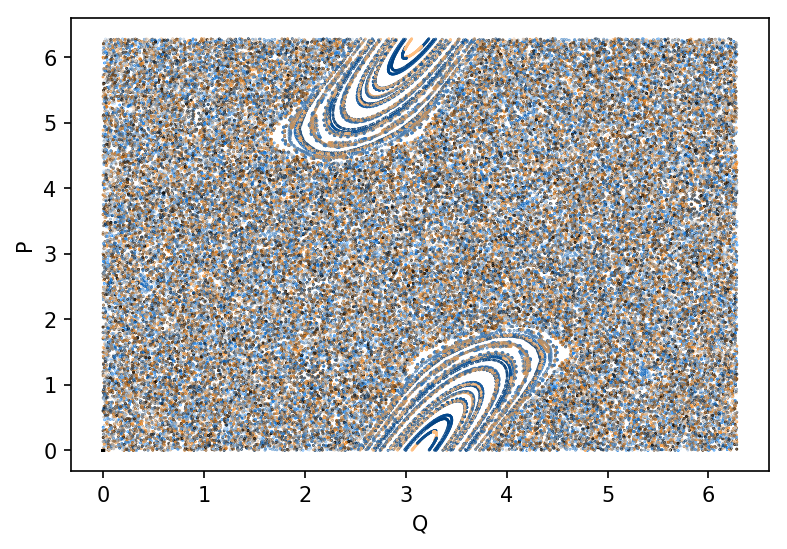

In [8]:
plot(e=3, r=.3)

Near $\epsilon=1$ points follow much more complex patterns.

# Animating the Chirikov Map

For fun. I will animate this map over changing values of $\epsilon$.

In [10]:
%matplotlib notebook
import animatplot as amp
from matplotlib.widgets import TextBox

plt.rcParams['figure.dpi'] = 150

Now we generate all the frames of data.

In [14]:
N = 100
framesq, framesp = [], []
num_frames = 200
es = np.linspace(.1,5,num_frames)
for e in es:
    P, Q, colours = frame(e, N)
    framesp.append(P)
    framesq.append(Q)

Now I animate those frames.

In [15]:
block = amp.blocks.Scatter(framesq, framesp, c=colours, s=.1)
anim = amp.Animation([block], amp.Timeline(es, fps=20))

plt.subplots_adjust(bottom=.3, left=-.1)

plt.xlabel('Q')
plt.ylabel('P')
plt.title("Chirikov's Standard Map")
plt.gca().set_aspect('equal')

ax_slider = plt.axes([.15, .05, .5, .03])
anim.timeline_slider(text='$\epsilon$', ax=ax_slider)

ax_eqns = plt.axes([.15,.1,.5,.1])
TextBox(ax_eqns, '', initial='\n'.join(["$P_i=(P_{i-1}+\epsilon\sin(Q_{i-1}))$ mod $2\pi$",
                                   "$Q_i=(P_{i-1}+Q_{i-1}+\epsilon\sin(Q_{i-1}))$ mod $2\pi$"]))

ax = plt.axes([.65,.5,.26,.2])
TextBox(ax, '', initial=f'Each frame is {N}\n'+'iterations of the map\n'
        +'where each colour\nrepresents a different\n'+'starting point')

# anim.save('chirikov.gif',writer='imagemagick')
plt.show()

<IPython.core.display.Javascript object>